In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_october.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [5]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/stephfuccio/status/1320470...,https://twitter.com/LizWilcox79/status/1319443...,https://twitter.com/PodRevDay/status/131574234...,https://twitter.com/EarbudsPodCol/status/13153...,https://twitter.com/mindfulness_for/status/131...
date,2020-10-25 21:00:08+00:00,2020-10-23 00:58:20+00:00,2020-10-12 19:53:16+00:00,2020-10-11 17:28:45+00:00,2020-10-09 17:45:47+00:00
content,#PodRevDay is Nov 8th:\nhttps://t.co/eRuEJxABa...,I'm listening to so many great podcasts whilst...,I need this @DishPodcast episode on stress rig...,Pod News\n \nThe first Thurs of each month is ...,"Its #PodRevDay - if youve heard the podcast, w..."
renderedContent,#PodRevDay is Nov 8th:\n1.review a podcast\n2....,I'm listening to so many great podcasts whilst...,I need this @DishPodcast episode on stress rig...,Pod News\n \nThe first Thurs of each month is ...,"Its #PodRevDay - if youve heard the podcast, w..."
id_x,1320470219463294981,1319443001920221184,1315742349155340289,1315343595818409987,1314623106556850177
user,"{'username': 'stephfuccio', 'displayname': 'St...","{'username': 'LizWilcox79', 'displayname': 'El...","{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'EarbudsPodCol', 'displayname': '...","{'username': 'mindfulness_for', 'displayname':..."
outlinks,"['http://1.review', 'http://3.Read']",[],[],[],['https://podcasts.apple.com/gb/podcast/mindfu...
tcooutlinks,"['https://t.co/eRuEJxABaI', 'https://t.co/my3v...",[],[],[],['https://t.co/55dwUav5ZV']
replyCount,0,0,0,1,0
retweetCount,3,4,1,1,0


In [6]:
df_full.shape

(1255, 37)

In [7]:
df_full = df_full.drop_duplicates()

In [8]:
df_full.shape

(1255, 37)

In [9]:
df_full.username.value_counts()[:10]

stephfuccio        213
PodRevDay          146
musciguy            53
Podchaser           34
LizWilcox79         33
OracleofDusk        29
Infectious_Pod      25
FitVeritas          17
DimensionPod        16
ToneDeafMusical     16
Name: username, dtype: int64

In [10]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [11]:
df_full.username.value_counts()[:10]

musciguy           53
Podchaser          34
LizWilcox79        33
OracleofDusk       29
Infectious_Pod     25
FitVeritas         17
ToneDeafMusical    16
DimensionPod       16
PersuadePod        14
Alistair_Pitts     13
Name: username, dtype: int64

In [12]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followers)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participted in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Averge Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

896: Tweets using the hashtag #PodRevDay.
315: People have participted in #PodRevDay.
575,430: Followers of participants in #PodRevDay.
17: Minimum number of countries with participants.
6.72: Averge Number of people liking a tweet about #PodRevDay
2.55: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [13]:
!mkdir plots

mkdir: cannot create directory ‘plots’: File exists


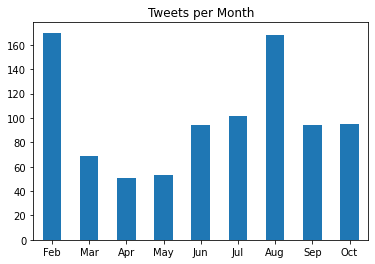

In [14]:
tweets_per_month = df_full.groupby('month').count().sort_values('month', ascending=True).reset_index()

months = ('Feb', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep", "Oct")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8)

ax = tweets_per_month.plot.bar(x='month', 
                          y='date', 
                          title="Tweets per Month",
                          legend=None)
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

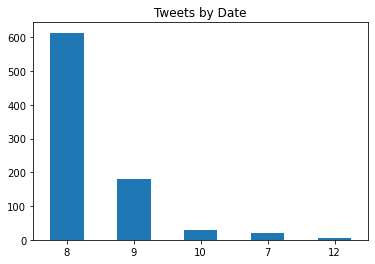

In [15]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

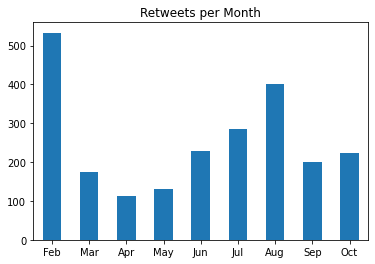

In [16]:
retweets_per_month = df_full.groupby(['month'])['retweetCount'].sum().sort_index(ascending=True)
ax3 = retweets_per_month.plot.bar(title="Retweets per Month")
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax3.figure.savefig('plots/retweets_per_month.png')

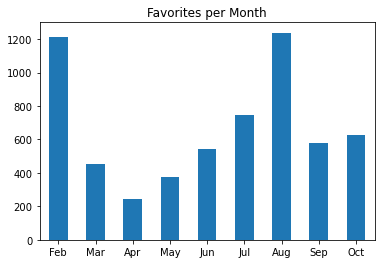

In [17]:
favorites_per_month = df_full.groupby(['month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

In [18]:
table = df_full.groupby(['month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [19]:
table_wide = table.pivot(index='month',
                               columns='country',
                               values=['total']).fillna(method='ffill', axis=0)

table_wide = (table_wide.append(pd.Series(name=1))
              .sort_index())

<ipython-input-19-4598b7a0a312>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table_wide = (table_wide.append(pd.Series(name=1))


In [20]:
table_wide.fillna(0, inplace=True)
table_wide

total                                                     \
country Australia Canada Ecuador France Germany India Italy Malaysia   
month                                                                  
1             0.0    0.0     0.0    0.0     0.0   0.0   0.0      0.0   
2             5.0    5.0     0.0    0.0     1.0   0.0   6.0      2.0   
3             5.0    5.0     1.0    0.0     1.0   0.0   6.0      2.0   
4             6.0    5.0     1.0    0.0     1.0   0.0   6.0      2.0   
5             6.0    6.0     1.0    0.0     2.0   1.0   6.0      2.0   
6             6.0    7.0     1.0    0.0     3.0   2.0   6.0      2.0   
7             6.0    9.0     1.0    1.0     5.0   2.0   6.0      2.0   
8             6.0   20.0     1.0    1.0     5.0   2.0   9.0      2.0   
9             6.0   24.0     1.0    1.0     5.0   2.0   9.0      2.0   
10            6.0   24.0     1.0    1.0     5.0   2.0   9.0      2.0   

                                                                             \
country New Zealand Nigeria Poland Serbia Spain Sweden United Arab Emirates   
month                                                                         
1               0.0     0.0    0.0    0.0   0.0    0.0                  0.0   
2               3.0     0.0    0.0    0.0   0.0    0.0                  0.0   
3               3.0     0.0    0.0    0.0   0.0    0.0                  0.0   
4               3.0     0.0    0.0    0.0   0.0    0.0                  0.0   
5               4.0     0.0    0.0    0.0   0.0    0.0                  0.0   
6               4.0     3.0    0.0    0.0   0.0    0.0                  0.0   
7               5.0     4.0    2.0    0.0   0.0    0.0                  0.0   
8               5.0     4.0    4.0    1.0   0.0    2.0                  3.0   
9               5.0     4.0    4.0    2.0   2.0    2.0                  3.0   
10              5.0     4.0    4.0    2.0   6.0    2.0                  3.0   

                                      
country United Kingdom United States  
month                                 
1                  0.0           0.0  
2                 13.0          74.0  
3                 20.0         113.0  
4                 24.0         138.0  
5                 34.0         164.0  
6                 48.0         210.0  
7                 59.0         249.0  
8                 62.0         338.0  
9                 71.0         384.0  
10                79.0         413.0

In [21]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [22]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [24]:
mon_num = list(range(1,11))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

months_dic = dict(zip(mon_num, mon_names))
table_wide.rename(index=months_dic, inplace=True)
table_wide

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,Spain,Sweden,United Arab Emirates,United Kingdom,United States
month,,,,,,,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,5.0,5.0,0.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0
February,5.0,5.0,0.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0
March,5.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,113.0
March,5.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,113.0
April,6.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,138.0
April,6.0,5.0,1.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,138.0
May,6.0,6.0,1.0,0.0,2.0,1.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,164.0


In [25]:
bcr.bar_chart_race(df=table_wide,
                   period_length=500,
                   title ="Tweets Per Country",
                   filename="plots/podrevday.gif")

/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [26]:
bcr.bar_chart_race(df=table_wide,
                   period_length=1250,
                   filename="plots/podrevday.mp4")

/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/evan/anaconda3/envs/prd/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
